<a href="https://colab.research.google.com/github/Untick/IrisID_gr1/blob/Ischenko-Ekaterina-folder/%D0%97%D0%B5%D0%BD%D0%B8%D1%86%D0%B0_8%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%BE%D0%B2_75%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D0%BD%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

АЛГОРИТМ
1.   Загрузка данных
2.   Формирование датасета
3.   Аугментация, создание выборок
4.   Построение модели
5.   Обучение
6.   Подбор параметров для получения точности 97%
7.   Визуализация

## Загрузка данных

In [1]:
# Сеть прямого распространения
from tensorflow.keras.models import Sequential 

# Базовые слои для свёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# Работа с изображениями
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# Оптимизаторы
from tensorflow.keras.optimizers import Adam     

# Используем для to_categoricall
from tensorflow.keras import utils               

# Для отрисовки изображений
from tensorflow.keras.preprocessing import image 

# Библиотека работы с массивами
import numpy as np

# Для отрисовки графиков
import matplotlib.pyplot as plt                  

# Для отрисовки изображений
from PIL import Image                            

# Для генерации случайных чисел 
import random                                    

# Для округления
import math                                      

# Для работы с файлами 
import os    
import shutil

# Для работы с файлами
import gc

# импортируем модуль для загрузки данных
import gdown 

# для разделения выборок
from sklearn.model_selection import train_test_split

# импорт tensorflow
import tensorflow as tf

# модуль для отсчета времени
import time

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Подключение гугл диска 
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Задание переменных

In [3]:
# задание переменных
ZIP_FILE = '/content/drive/MyDrive/ZENICA/iris49_56.zip' # исходный zip-файл
TRAIN_PATH = '/content/drive/MyDrive/ZENICA/iris_base' # путь к тренировочной базе в Google Drive
TEST_PATH = '/content/drive/MyDrive/ZENICA/iris_test' # путь к тестовой базе в Google Drive

In [4]:
TEST_SPLIT = 0.2
VAL_SPLIT = 0.2

In [5]:
IMG_WIDTH           = 192 # 768                   # Ширина изображения для нейросети
IMG_HEIGHT          = 144 #576                   # Высота изображения для нейросети
IMG_CHANNELS        = 3                     # Количество каналов (для RGB равно 3, для Grey равно 1)

## Формирование датасета

In [6]:
# Очистка данных от прошлого запуска (если есть)
!rm -rf {TRAIN_PATH} {TEST_PATH}

# Архив разархивируем в путь TRAIN_PATH
!unzip -q {ZIP_FILE} -d {TRAIN_PATH} # Указываем путь к базе в Google Drive

# Проверяем, что в базе?
print('Проверяем, что в папке TRAIN_PATH:',os.listdir(TRAIN_PATH))

# Создаем сортированный список из базы
train_list = sorted(os.listdir(TRAIN_PATH))
print('Отсортированный список train_list:', train_list)

len_list = len(train_list)  # Длина списка

# Проверка результата
print(f'Количество файлов: {len_list}')

Проверяем, что в папке TRAIN_PATH: ['056R_1.png', '049L_2.png', '049L_3.png', '049R_1.png', '049R_2.png', '049R_3.png', '050L_1.png', '050L_2.png', '050L_3.png', '050R_1.png', '050R_2.png', '050R_3.png', '051L_1.png', '051L_2.png', '051L_3.png', '051R_1.png', '051R_2.png', '051R_3.png', '052L_1.png', '052L_2.png', '052L_3.png', '052R_1.png', '052R_2.png', '052R_3.png', '053L_1.png', '053L_2.png', '053L_3.png', '053R_1.png', '053R_2.png', '053R_3.png', '054L_1.png', '054L_2.png', '054L_3.png', '054R_1.png', '054R_2.png', '054R_3.png', '055L_1.png', '055L_2.png', '055L_3.png', '055R_1.png', '055R_2.png', '055R_3.png', '056L_1.png', '056L_2.png', '056L_3.png', '049L_1.png', '056R_2.png', '056R_3.png']
Отсортированный список train_list: ['049L_1.png', '049L_2.png', '049L_3.png', '049R_1.png', '049R_2.png', '049R_3.png', '050L_1.png', '050L_2.png', '050L_3.png', '050R_1.png', '050R_2.png', '050R_3.png', '051L_1.png', '051L_2.png', '051L_3.png', '051R_1.png', '051R_2.png', '051R_3.png', '052

In [7]:
# Создаем папки для каждого класса и перемещаем файлы С ГЛАЗАМИ в соответствующую папку ИХ КЛАССА
CLASS_LIST = []           # Список папок - пока пуст
for i in range(len_list):           # перебираем файлы с глазами в списке train_list
        file_name=train_list[i]      # берем название файла с глазом
        class_name = file_name[:3]  # создаем название папки из первых трех символов
        class_full_path = os.path.join(TRAIN_PATH,class_name)  # создаем полный путь к папке
        if not os.path.exists(class_full_path):                # если такой папки нет, то создаем папку
               os.makedirs(class_full_path)
               CLASS_LIST.append(class_name)
        shutil.move(os.path.join(TRAIN_PATH,file_name), class_full_path) #переносим файл с глазом в папку правильного класса
CLASS_COUNT = len(CLASS_LIST)        # получилось такое количество классов CLASS_COUNT
print(f'Создано (CLASS_COUNT):{CLASS_COUNT} папок. Названия папок классов = список CLASS_LIST: {CLASS_LIST}')

Создано (CLASS_COUNT):8 папок. Названия папок классов = список CLASS_LIST: ['049', '050', '051', '052', '053', '054', '055', '056']


In [8]:
# создание итоговых списков "путь изображения + метка класса" для обучения

# Создание директории тестовых данных
os.mkdir(TEST_PATH)                                        
train_count = 0
test_count = 0

for class_name in CLASS_LIST:                              # Для всех классов по порядку номеров (их меток)
    class_path_f = f'{TRAIN_PATH}/{class_name}'              # Формирование полного пути к папке с изображениями класса
    test_path_f = f'{TEST_PATH}/{class_name}'           # Полный путь для тестовых данных класса
    class_files = os.listdir(class_path_f)                   # Получение списка имен файлов с изображениями текущего класса
    class_file_count = len(class_files)                    # Получение общего числа файлов класса
    os.mkdir(test_path_f)                               # Создание подпапки класса для тестовых данных
    test_file_count = int(class_file_count * TEST_SPLIT)   # Определение числа тестовых файлов для класса
    test_files = class_files[-test_file_count:]            # Выделение файлов для теста от конца списка
    for f in test_files:                                   # Перемещение тестовых файлов в папку для теста
        os.rename(f'{class_path_f}/{f}', f'{test_path_f}/{f}')
    train_count += class_file_count                        # Увеличение общего счетчика файлов обучающего набора
    test_count += test_file_count                          # Увеличение общего счетчика файлов тестового набора

    print(f'Размер класса {class_name}: {class_file_count} фото, для теста выделено файлов: {test_file_count}')

print(f'Общий размер базы: {train_count}, выделено для обучения: {train_count - test_count}, для теста: {test_count}')


Размер класса 049: 6 фото, для теста выделено файлов: 1
Размер класса 050: 6 фото, для теста выделено файлов: 1
Размер класса 051: 6 фото, для теста выделено файлов: 1
Размер класса 052: 6 фото, для теста выделено файлов: 1
Размер класса 053: 6 фото, для теста выделено файлов: 1
Размер класса 054: 6 фото, для теста выделено файлов: 1
Размер класса 055: 6 фото, для теста выделено файлов: 1
Размер класса 056: 6 фото, для теста выделено файлов: 1
Общий размер базы: 48, выделено для обучения: 40, для теста: 8


## Аугментация

In [9]:
# Параметры аугментации и модели
ROTATION_RANGE      = 8                     # Пределы поворота
WIDTH_SHIFT_RANGE   = 0.15                  # Пределы сдвига по горизонтали
HEIGHT_SHIFT_RANGE  = 0.15                  # Пределы сдвига по вертикали
ZOOM_RANGE          = 0.15                  # Пределы увеличения/уменьшения
BRIGHTNESS_RANGE    = (0.7, 1.3)            # Пределы изменения яркости
HORIZONTAL_FLIP     = False                 # Горизонтальное отражение запрещено

BATCH_SIZE          = 8                     # Размер батча
EPOCHS              = 200                   # Эпох обучения
OPTIMIZER           = Adam(0.0001)           # Оптимизатор


In [10]:
# Нормализация и аугментация обучающих данных. Разделение выборки на обучающую и проверочную 

train_datagen = ImageDataGenerator(
                    rescale=1. / 255.,
                    rotation_range=ROTATION_RANGE,
                    width_shift_range=WIDTH_SHIFT_RANGE,
                    height_shift_range=HEIGHT_SHIFT_RANGE,
                    zoom_range=ZOOM_RANGE,
                    brightness_range=BRIGHTNESS_RANGE,
                    horizontal_flip=HORIZONTAL_FLIP,
                    validation_split=VAL_SPLIT
                )


In [11]:
# Нормализация тестовых изображений
test_datagen = ImageDataGenerator(
                   rescale=1. / 255.
                )

In [12]:
# Создание обучающей выборки
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True, 
    subset='training'
)

Found 32 images belonging to 8 classes.


In [13]:
# Создание проверочной выборки
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

# Тестовая выборка генерируется из папки тестового набора
test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=test_count,
    class_mode='categorical',
    shuffle=True,
)

Found 8 images belonging to 8 classes.
Found 8 images belonging to 8 classes.


In [14]:
# Проверка формы данных
print(f'Формы данных тренировочной выборки: {train_generator[0][0].shape}, {train_generator[0][1].shape}, батчей: {len(train_generator)}')
print(f'Формы данных   проверочной выборки: {validation_generator[0][0].shape}, {validation_generator[0][1].shape}, батчей: {len(validation_generator)}')
print(f'Формы данных      тестовой выборки: {test_generator[0][0].shape}, {test_generator[0][1].shape}, батчей: {len(test_generator)}')

print()

# Проверка назначения меток классов
print(f'Метки классов тренировочной выборки: {train_generator.class_indices}')
print(f'Метки классов   проверочной выборки: {validation_generator.class_indices}')
print(f'Метки классов      тестовой выборки: {test_generator.class_indices}')


Формы данных тренировочной выборки: (8, 144, 192, 3), (8, 8), батчей: 4
Формы данных   проверочной выборки: (8, 144, 192, 3), (8, 8), батчей: 1
Формы данных      тестовой выборки: (8, 144, 192, 3), (8, 8), батчей: 1

Метки классов тренировочной выборки: {'049': 0, '050': 1, '051': 2, '052': 3, '053': 4, '054': 5, '055': 6, '056': 7}
Метки классов   проверочной выборки: {'049': 0, '050': 1, '051': 2, '052': 3, '053': 4, '054': 5, '055': 6, '056': 7}
Метки классов      тестовой выборки: {'049': 0, '050': 1, '051': 2, '052': 3, '053': 4, '054': 5, '055': 6, '056': 7}


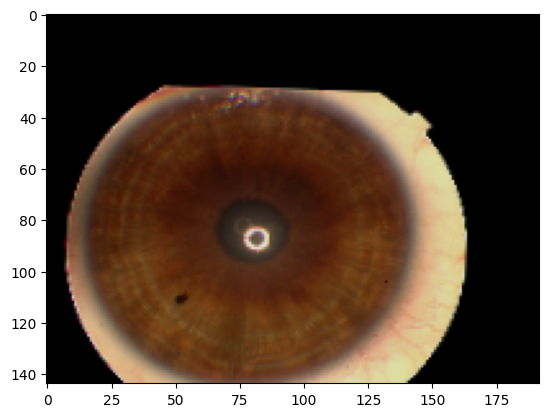

In [15]:
# Проверка одного изображения из выборки
#Аугментация работает "на лету".
#Индексы для примера выбраны такие: [1][0][2], что означает:
#1: номер батча в выборке. Сам батч - это кортеж (x_train, y_train) с примерами и метками классов;
#0: первый элемент в кортеже, то есть сами изображения. Под индексом 1 будут метки классов в формате one hot encoding для изображений;
#2: номер картинки в батче.

plt.imshow(train_generator[1][0][2])
plt.show()

In [16]:
# Функция рисования образцов изображений из заданной выборки

def show_batch(batch,                # батч с примерами
               img_range=range(20),  # диапазон номеров картинок
               figsize=(25,8),      # размер полотна для рисования одной строки таблицы
               columns=5             # число колонок в таблице
               ):

    for i in img_range:
        ix = i % columns
        if ix == 0:
            fig, ax = plt.subplots(1, columns, figsize=figsize)
        class_label = np.argmax(batch[1][i])
        ax[ix].set_title(CLASS_LIST[class_label])
        ax[ix].imshow(batch[0][i])  
        ax[ix].axis('off')
        plt.tight_layout()

    plt.show()

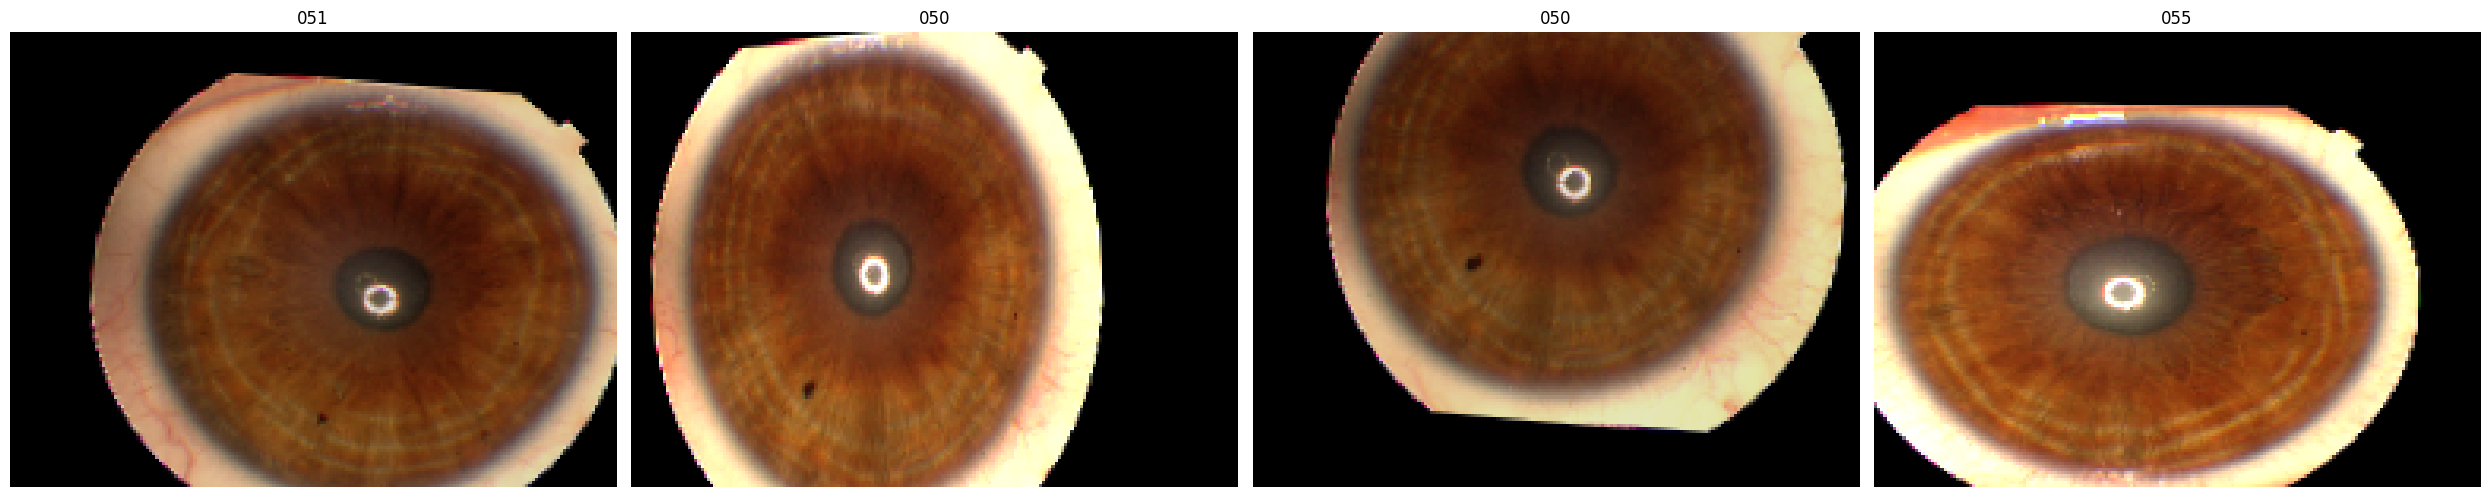

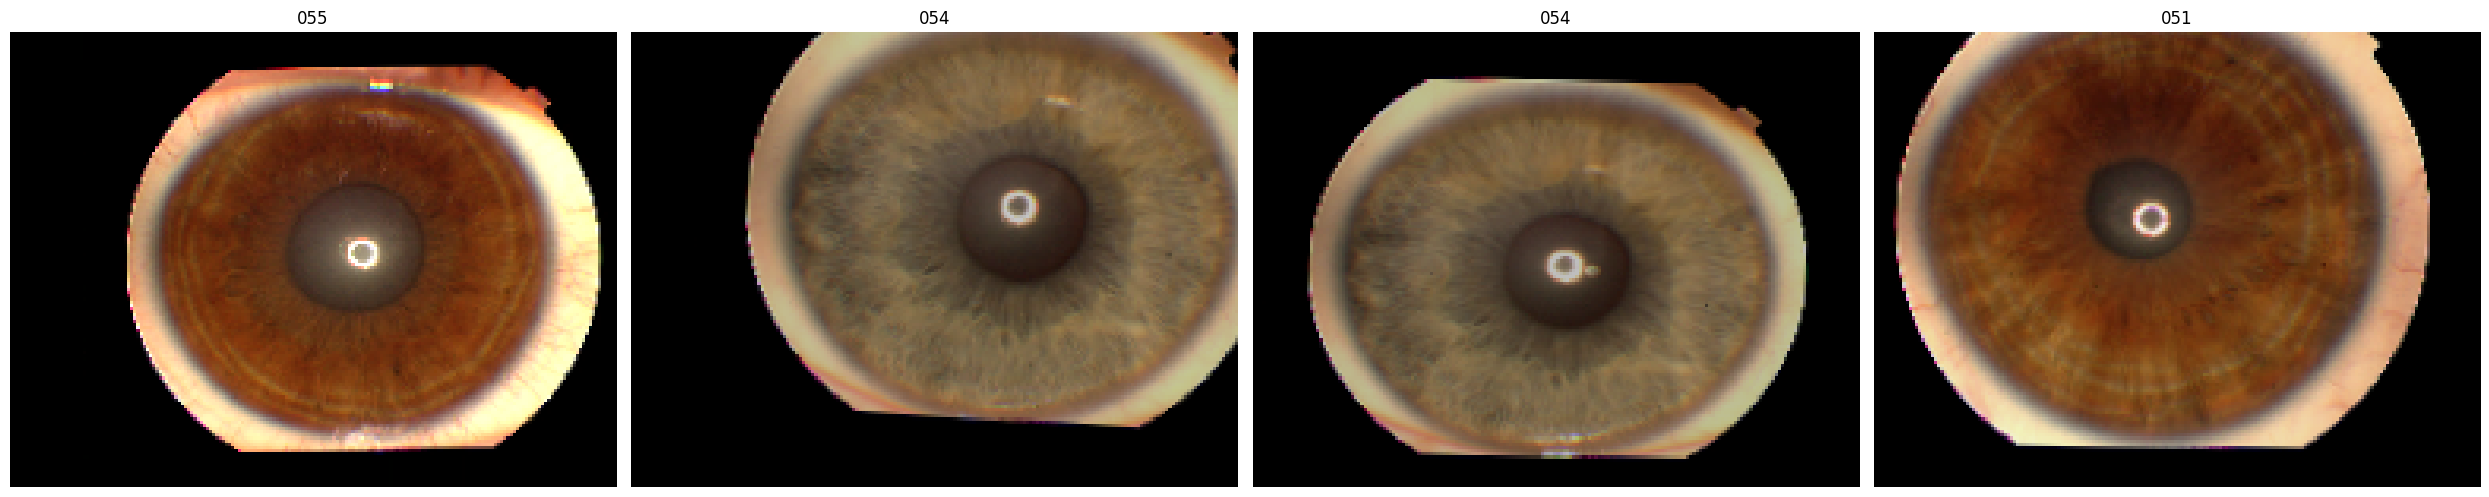

In [17]:
# Вывод примеров из 0-го батча train_generator
#show_batch(train_generator[0])
show_batch(train_generator[1], range(8), columns = 4)

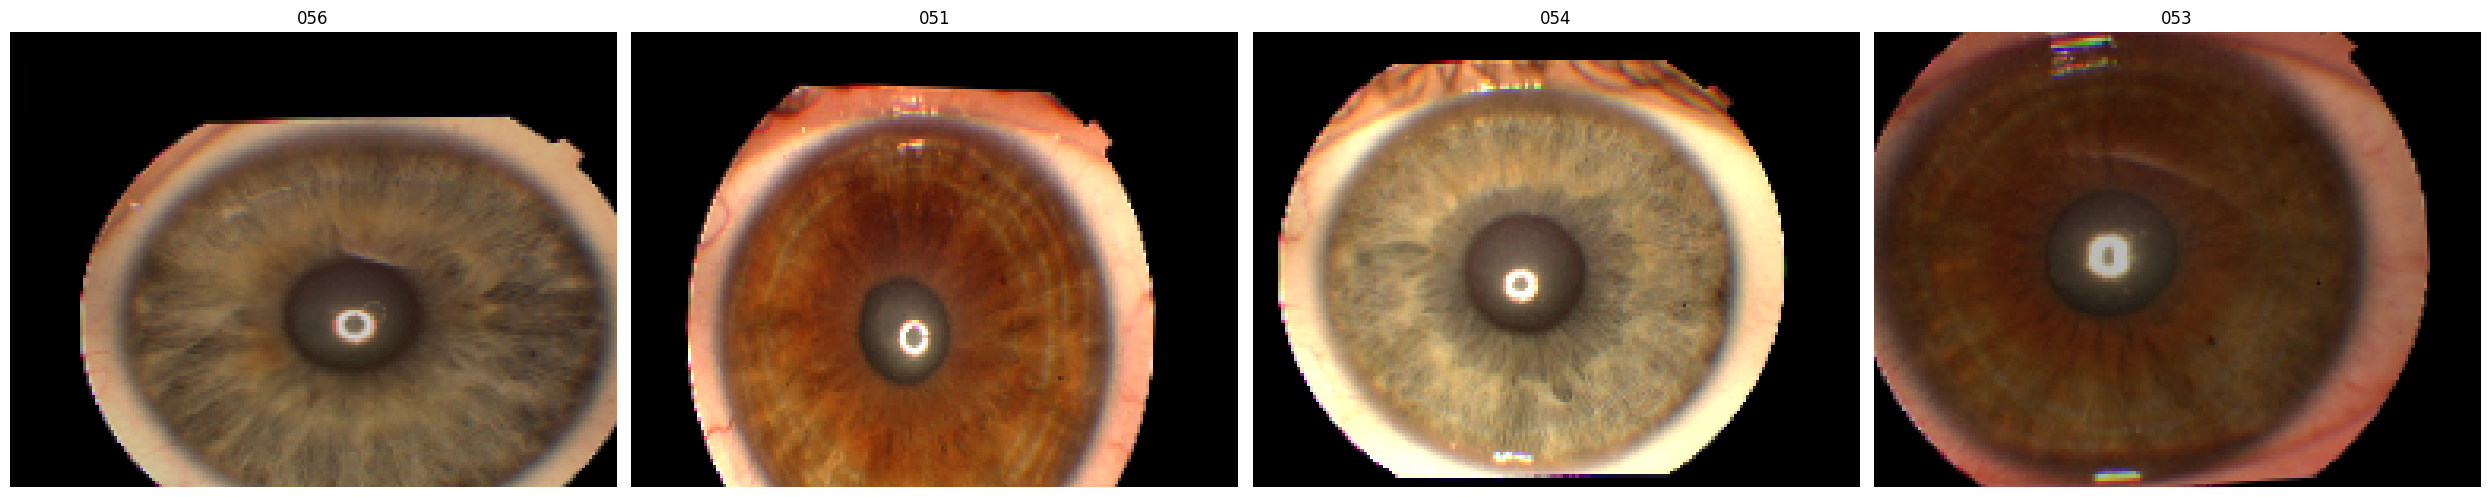

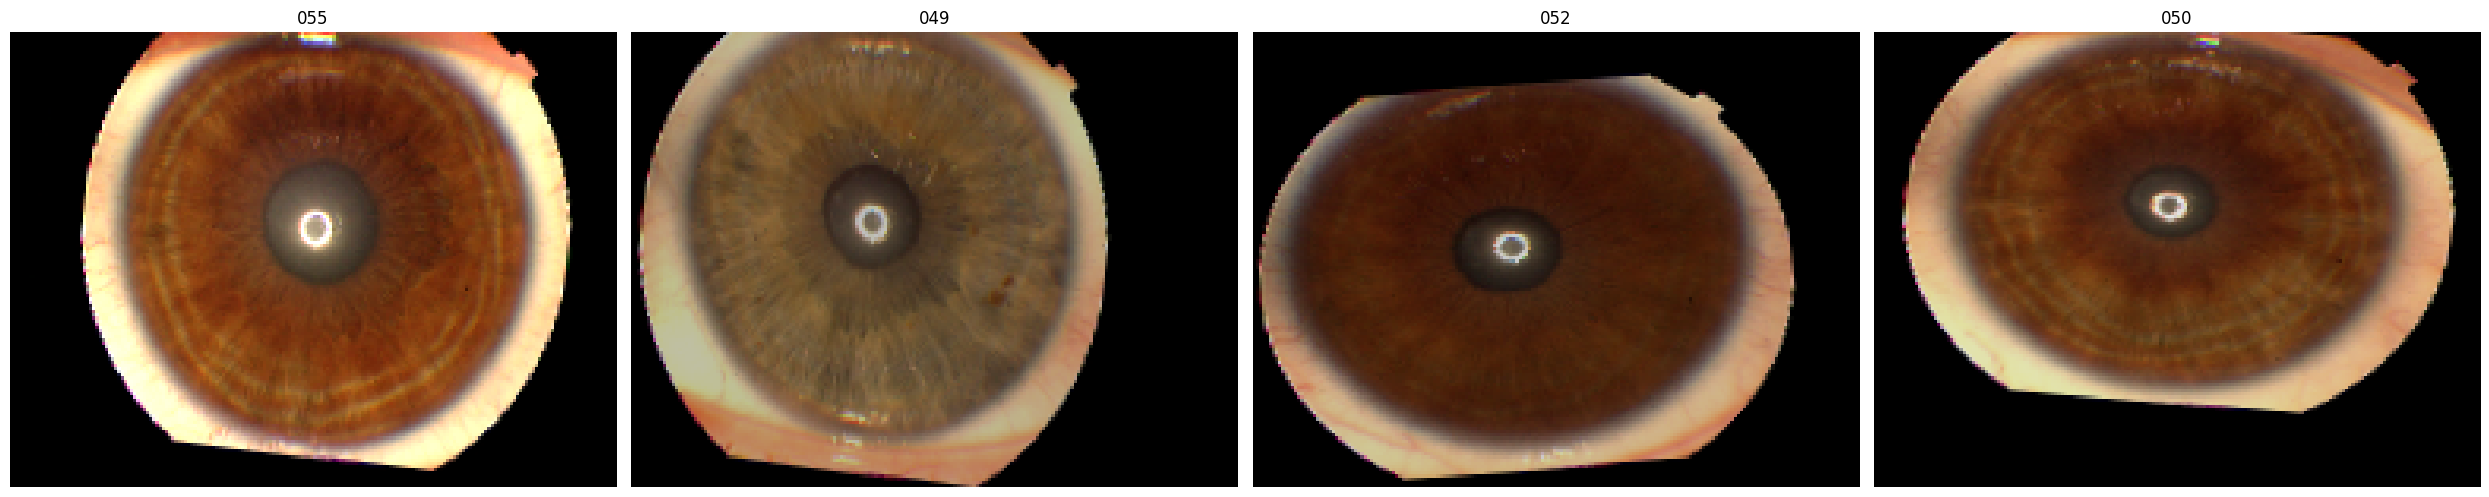

In [18]:
show_batch(validation_generator[0], range(8), columns = 4)

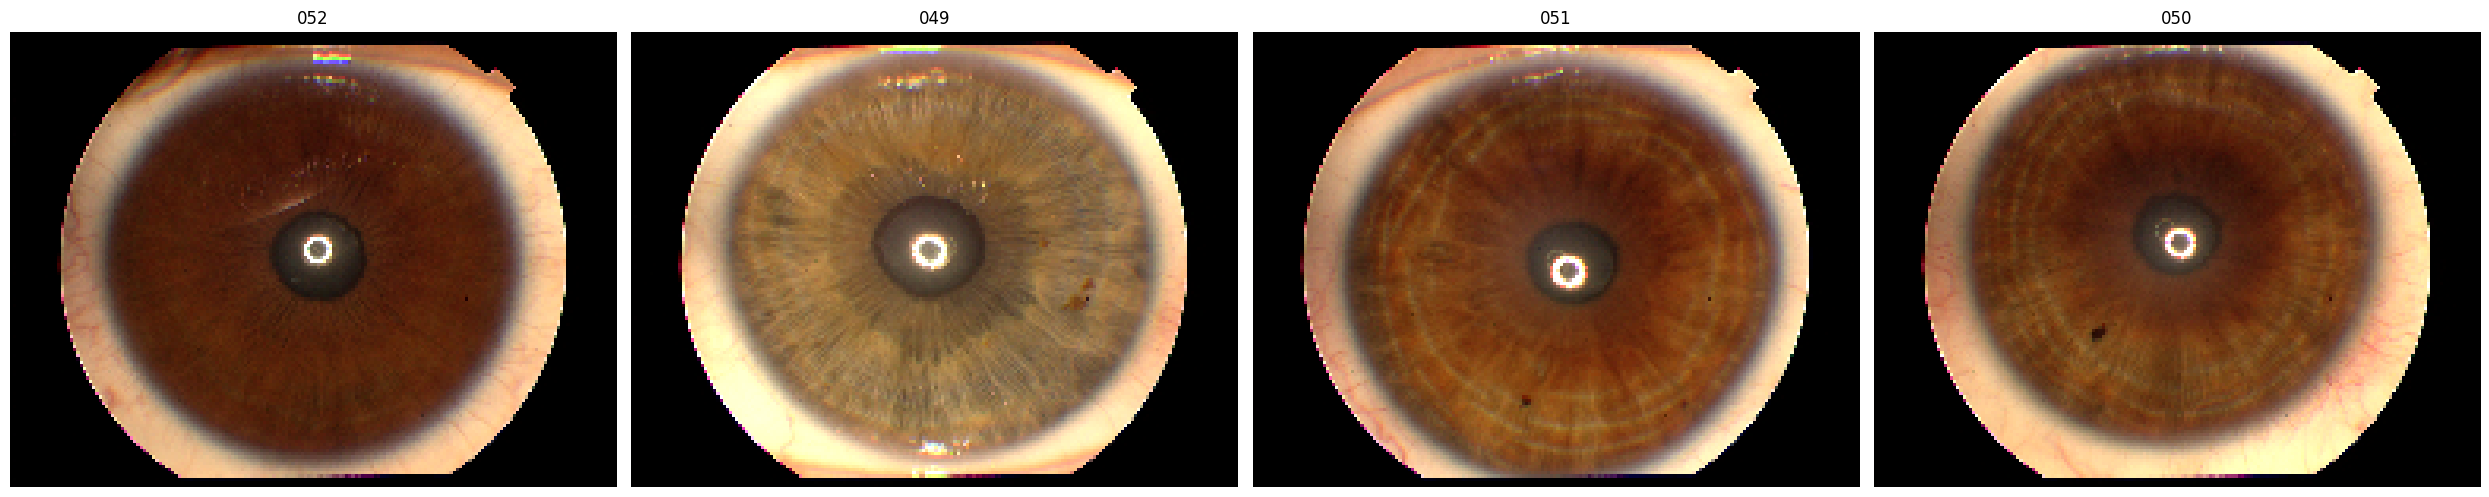

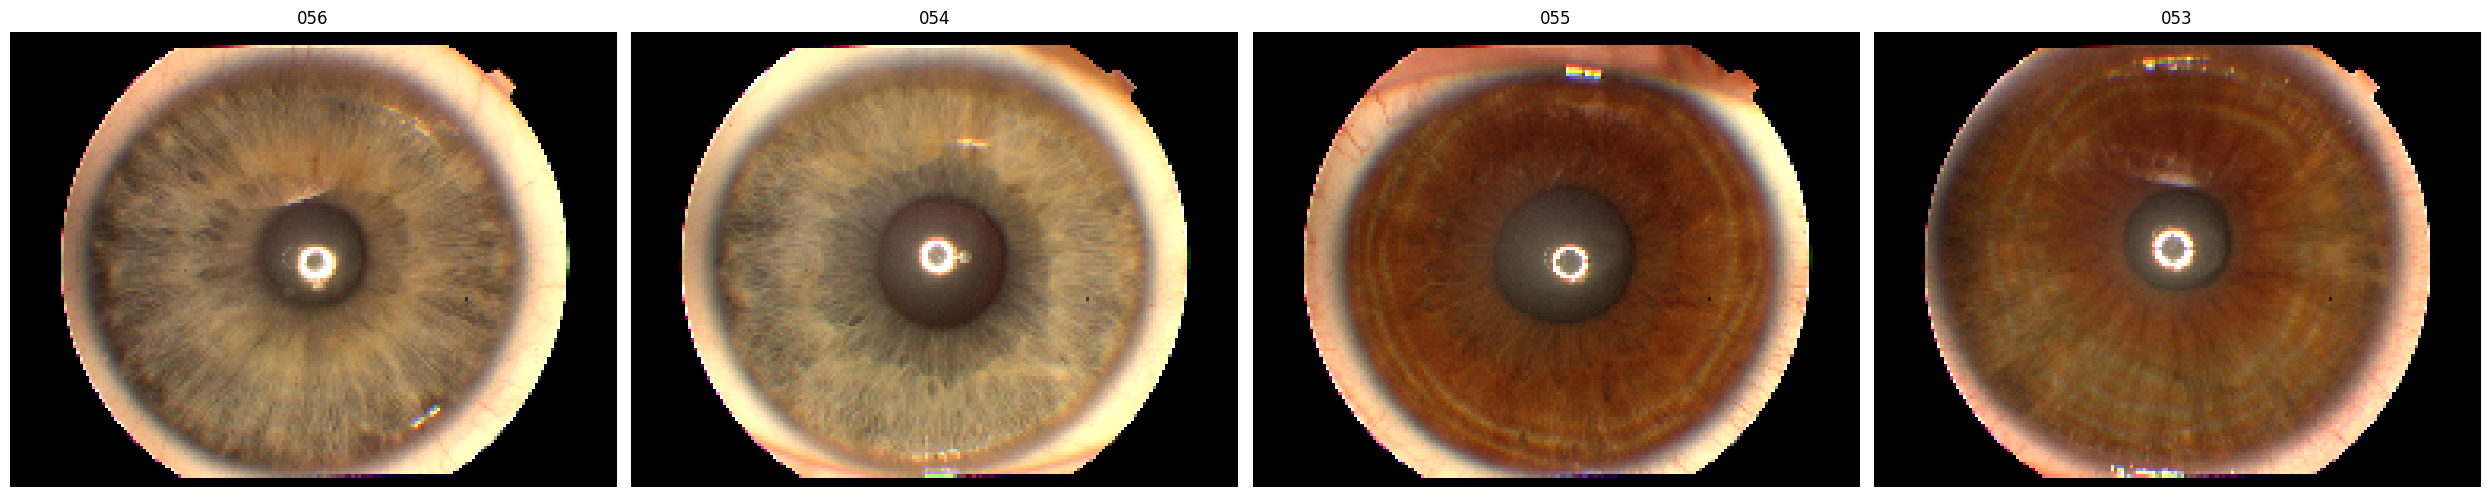

In [19]:
show_batch(test_generator[0], range(8), columns = 4)

## Создание и обучение модели нейронной сети

### Сервисные функции

In [20]:
# Функция компиляции и обучения модели нейронной сети
# По окончанию выводит графики обучения

def compile_train_model(model,                  # модель нейронной сети
                        train_data,             # обучающие данные
                        val_data,               # проверочные данные
                        optimizer=OPTIMIZER,    # оптимизатор
                        epochs=EPOCHS,          # количество эпох обучения
                        batch_size=BATCH_SIZE,  # размер батча
                        figsize=(20, 5)):       # размер полотна для графиков

    # Компиляция модели
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(train_data,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=val_data)

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], 
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], 
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], 
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], 
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

In [21]:
# Функция вывода результатов оценки модели на заданных данных

def eval_model(model, 
               x,                # данные для предсказания модели (вход)
               y_true,           # верные метки классов в формате OHE (выход)
               class_labels=[],  # список меток классов
               cm_round=3,       # число знаков после запятой для матрицы ошибок
               title='',         # название модели
               figsize=(10, 10)  # размер полотна для матрицы ошибок
               ):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    ax.images[-1].colorbar.remove()       # Стирание ненужной цветовой шкалы
    fig.autofmt_xdate(rotation=45)        # Наклон меток горизонтальной оси
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    plt.show()    

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

In [22]:
# Совместная функция обучения и оценки модели нейронной сети

def compile_train_eval_model(model,                    # модель нейронной сети
                             train_data,               # обучающие данные
                             val_data,                 # проверочные данные
                             test_data,                # тестовые данные
                             class_labels=CLASS_LIST,  # список меток классов
                             title='',                 # название модели
                             optimizer=OPTIMIZER,      # оптимизатор
                             epochs=EPOCHS,            # количество эпох обучения
                             batch_size=BATCH_SIZE,    # размер батча
                             graph_size=(20, 5),       # размер полотна для графиков обучения
                             cm_size=(10, 10)          # размер полотна для матрицы ошибок
                             ):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model, 
                        train_data,
                        val_data,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, test_data[0][0], test_data[0][1], 
               class_labels=class_labels, 
               title=title,
               figsize=cm_size)

### Архитектура модели нейронной сети

In [23]:
# Создание последовательной модели
model_conv = Sequential()

# Первый сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))
model_conv.add(BatchNormalization())

# Второй сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

# Третий сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(BatchNormalization())
model_conv.add(Dropout(0.2))

# Четвертый сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Dropout(0.2))

# Пятый сверточный слой
model_conv.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_conv.add(BatchNormalization())

# Шестой сверточный слой
model_conv.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Dropout(0.2))

# Слой преобразования многомерных данных в одномерные 
model_conv.add(Flatten())

# Промежуточный полносвязный слой
model_conv.add(Dense(2048, activation='relu'))

# Промежуточный полносвязный слой
model_conv.add(Dense(4096, activation='relu'))

# Выходной полносвязный слой с количеством нейронов по количеству классов
model_conv.add(Dense(CLASS_COUNT, activation='softmax')) 




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 192, 256)     7168      
                                                                 
 batch_normalization (BatchN  (None, 144, 192, 256)    1024      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 192, 256)     590080    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 64, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 64, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 48, 64, 256)      1

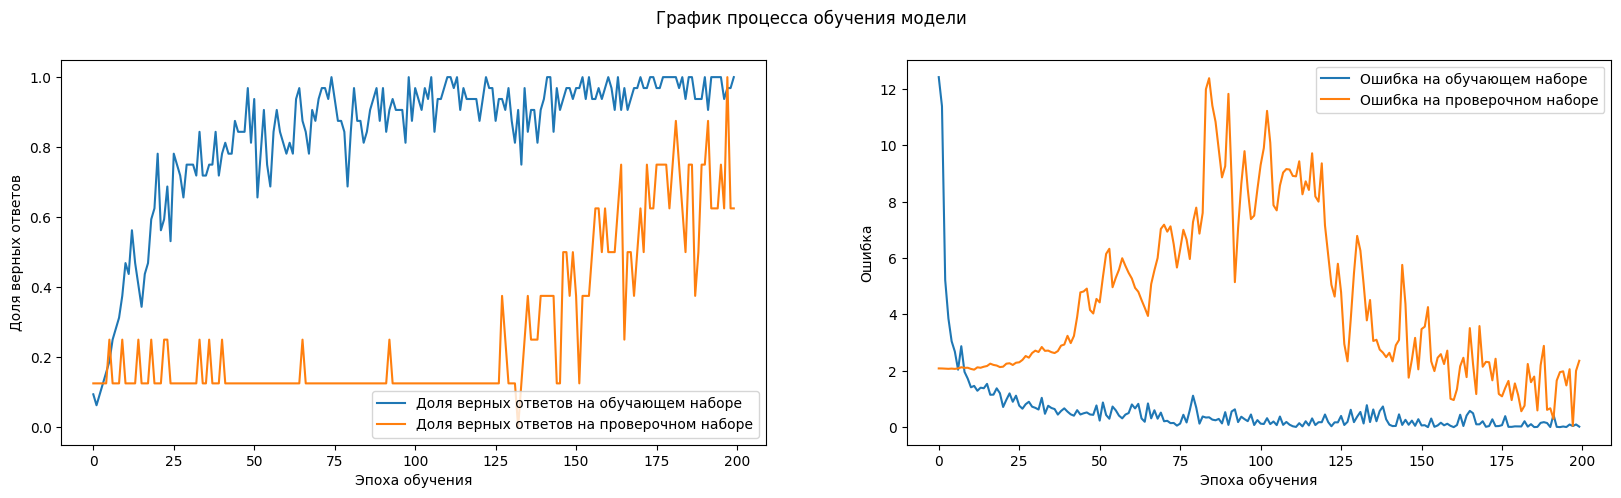

1/1 [==============================] - 0s 157ms/step


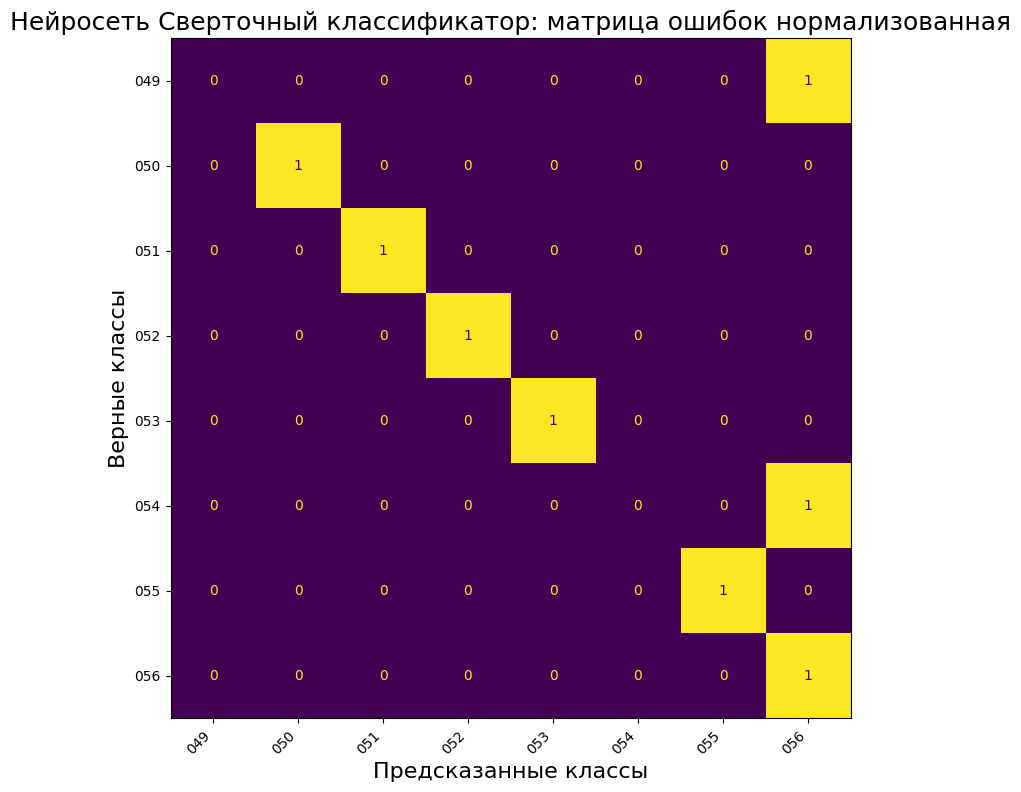

----------------------------------------------------------------------------------------------------
Нейросеть: Сверточный классификатор
Класс: 049                  100% сеть отнесла к классу 056                  - НЕВЕРНО :-(
Класс: 050                  100% сеть отнесла к классу 050                  - ВЕРНО :-)
Класс: 051                  100% сеть отнесла к классу 051                  - ВЕРНО :-)
Класс: 052                  100% сеть отнесла к классу 052                  - ВЕРНО :-)
Класс: 053                  100% сеть отнесла к классу 053                  - ВЕРНО :-)
Класс: 054                  100% сеть отнесла к классу 056                  - НЕВЕРНО :-(
Класс: 055                  100% сеть отнесла к классу 055                  - ВЕРНО :-)
Класс: 056                  100% сеть отнесла к классу 056                  - ВЕРНО :-)

Средняя точность распознавания:  75%


In [24]:
# Обучение модели и вывод оценки ее работы на тестовых данных
compile_train_eval_model(model_conv,
                         train_generator,
                         validation_generator,
                         test_generator,
                         class_labels=CLASS_LIST,
                         title='Сверточный классификатор')